# ASSIGNMENT 3

#### Question 1

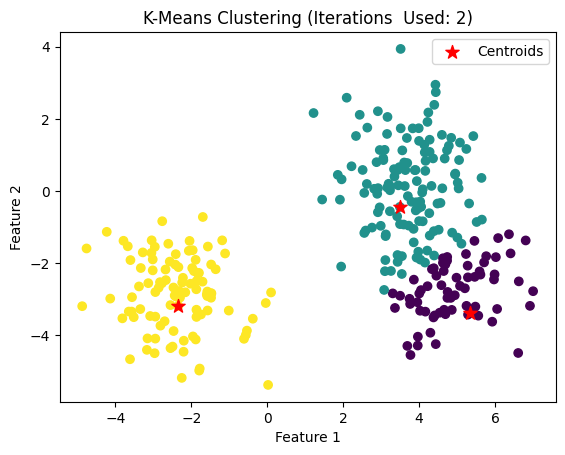

In [14]:
import numpy as np
from  sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def k_means (X, k, max_iter=100, tol=1e-4, random_state=None):

    x_samples, x_features = X.shape
    centroid_index = np.random.choice(x_samples,k,replace = False) #Choosing Different Centroids.
    centroids = X[centroid_index]
    label_index = []
    tol_check = True
    j =1
    while j <= max_iter and tol_check:

        for one_sample in range(x_samples):
            norm_list = []
            for centroid in centroids:
                distance = np.linalg.norm(X[one_sample] - centroid)**2
                norm_list.append(np.array(distance))
            label_index.append(int(np.argmin(norm_list))) #updates index of nearest centroid.

        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            points = X[label_index == i]
            if len(points) > 0:
                new_centroids[i] = np.mean(points, axis=0)
            else:
                new_centroids[i] = centroids[i]

        shift = np.linalg.norm(np.array(new_centroids) - np.array(centroids), axis=1)
        max_shift = np.max(shift)
        centroids = new_centroids

        if max_shift < tol:
            tol_check = False
        j += 1
    return centroids , label_index , j

X,y = make_blobs(n_samples=300)

centroids, label, no_of_iter =k_means(X,k=3)

plt.scatter(X[:,0], X[:,1], c = label)
plt.scatter(centroids[:,0], centroids[:,1] , s = 100 , c = "red", marker = '*', label = 'Centroids' )
plt.title(f"K-Means Clustering (Iterations  Used: {no_of_iter})")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

######

#### Question 2

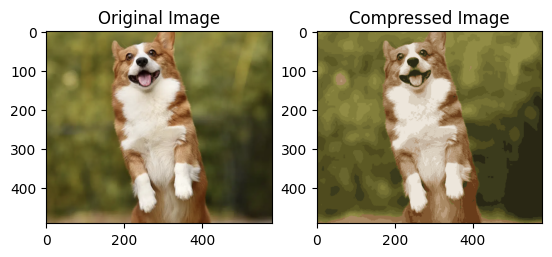

Original file size was observe to be: 279.3 KB
Compressed file size: 50.09 KB
File size reduced by: 82.06%


In [9]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

image = Image.open('dog.png')
image = image.convert('RGB')
image_arr = np.array(image)
w = image_arr.shape
# print(w)
N = w[0]*w[1]
# print(N)
reshaped_arr= image_arr.reshape(N,3)

kmeans = KMeans(n_clusters=16, init='k-means++', random_state=42)
kmeans.fit(reshaped_arr)
clustering_labels = kmeans.predict(reshaped_arr)
centers = kmeans.cluster_centers_.astype(np.uint8)
compressed_reshaped_arr = centers[clustering_labels]

compressed_image_arr = compressed_reshaped_arr.reshape(image_arr.shape)

fig, axes = plt.subplots(1, 2,)

axes[0].imshow(image_arr)
axes[1].imshow(compressed_image_arr)
axes[0].set_title("Original Image")
axes[1].set_title("Compressed Image")

plt.show()

Image.fromarray(image_arr).save('Original.png')
Image.fromarray(compressed_image_arr).save('Compressed.png')

original_image_size = os.path.getsize('Original.png')
compressed_image_size = os.path.getsize('Compressed.png')
reduction_percentage =  ((original_image_size - compressed_image_size) / original_image_size)*100

original_image_size_in_KB = (original_image_size/1024)
original_image_size_in_KB = round(original_image_size_in_KB,2)

compressed_image_size_in_KB = (compressed_image_size/1024)
compressed_image_size_in_KB = round(compressed_image_size_in_KB ,2)

print(f"Original file size was observe to be: {original_image_size_in_KB} KB")
print(f"Compressed file size: {compressed_image_size_in_KB} KB")
print(f"File size reduced by: {reduction_percentage:.2f}%")

######

#### Question 3

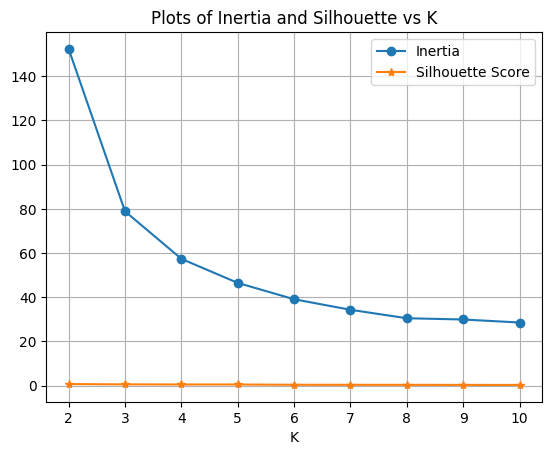

The smallest `k` where the inertia drop is < 10 % of the previous drop is: 4
The `k` that maximises the silhouette score is:2


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data

k_list = range(2,11)
inertia_list = []
silhouette_list = []
for k in k_list:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    labels = model.predict(X)
    inertia_list.append(model.inertia_)
    silhouette_list.append(silhouette_score(X, labels))

plt.plot(k_list,inertia_list,marker = 'o',label = 'Inertia')
plt.plot(k_list,silhouette_list,marker = '*',label = 'Silhouette Score')
plt.legend()
plt.xlabel('K')
plt.title("Plots of Inertia and Silhouette vs K")
plt.grid(True)
plt.show()

k_silhouette = k_list[np.argmax(silhouette_list)]

drops = []
for i in range(8):
    drops.append(inertia_list[i+1] - inertia_list[i]) # Without considering the last value as it has no drop

per_drops = []
for i in range(7):
    per_drop = abs(drops[i+1] - drops[i])/drops[i]
    per_drops.append(per_drop)
for j in per_drops:
    if j < 0.1:
        best_drop_index = per_drops.index(j)
        break
    else:
        continue
k_elbow = k_list[best_drop_index+2]

print(f"The smallest `k` where the inertia drop is < 10 % of the previous drop is: {k_elbow}")
print(f"The `k` that maximises the silhouette score is:{k_silhouette}")

######

#### Question 4

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
import time
from tabulate import tabulate


def benchmark_kmeans():

    X, y = make_blobs(n_samples=1000000,centers= 10,
                      n_features = 10, random_state = 42)

    results = {}

    starting_time1 = time.perf_counter()
    model_kmeans = KMeans(n_clusters=10, random_state= 42)
    model_kmeans.fit(X)
    ending_time1 = time.perf_counter()

    results["KMeans"] = {
        "fit time(s)" : ending_time1 - starting_time1,
        "final inertia": model_kmeans.inertia_,
        "Adjusted Rand Index (ARI)":  adjusted_rand_score(y, model_kmeans.labels_)
    }

    starting_time2 = time.perf_counter()
    model_minibatch = MiniBatchKMeans(n_clusters=10,batch_size=10000,random_state=42)
    model_minibatch.fit(X)
    ending_time2 = time.perf_counter()
    results["MiniBatchKMeans"] = {
        "fit time(s)": ending_time2 - starting_time2,
        "final inertia": model_minibatch.inertia_,
        "Adjusted Rand Index (ARI)": adjusted_rand_score(y, model_minibatch.labels_)
    }
    table = [
        ["KMeans", f"{ending_time1 - starting_time1:.2f}", f"{model_kmeans.inertia_:.0f}",
         f"{adjusted_rand_score(y, model_kmeans.labels_):.4f}"],
        ["MiniBatchKMeans", f"{ending_time2 - starting_time2:.2f}", f"{model_minibatch.inertia_:.0f}",
         f"{adjusted_rand_score(y, model_minibatch.labels_):.4f}"]
    ]
    
    headers = ["Model", "Time (s)", "Inertia", "Adjusted Rand Index"]
    print(tabulate(table, headers=headers, tablefmt="pretty"))

    return results
benchmark_kmeans()






+-----------------+----------+----------+---------------------+
|      Model      | Time (s) | Inertia  | Adjusted Rand Index |
+-----------------+----------+----------+---------------------+
|     KMeans      |   1.27   | 10000159 |       1.0000        |
| MiniBatchKMeans |   0.22   | 10000843 |       1.0000        |
+-----------------+----------+----------+---------------------+


{'KMeans': {'fit time(s)': 1.2713339000474662,
  'final inertia': 10000158.698950235,
  'Adjusted Rand Index (ARI)': 1.0},
 'MiniBatchKMeans': {'fit time(s)': 0.2208264000946656,
  'final inertia': 10000842.529979581,
  'Adjusted Rand Index (ARI)': 1.0}}